In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
file_path = 'feedback.csv' 
df = pd.read_csv(file_path, delimiter=';')

In [48]:
feedback_columns = df.columns[8:]

In [49]:
feedback_df = df[feedback_columns].copy()

In [50]:
feedback_df = feedback_df.apply(pd.to_numeric, errors='coerce')

In [51]:
feedback_df['Gênero'] = df['Qual a a sua identidade de ganero?']

In [52]:
gender_feedback = feedback_df.groupby('Gênero').mean()

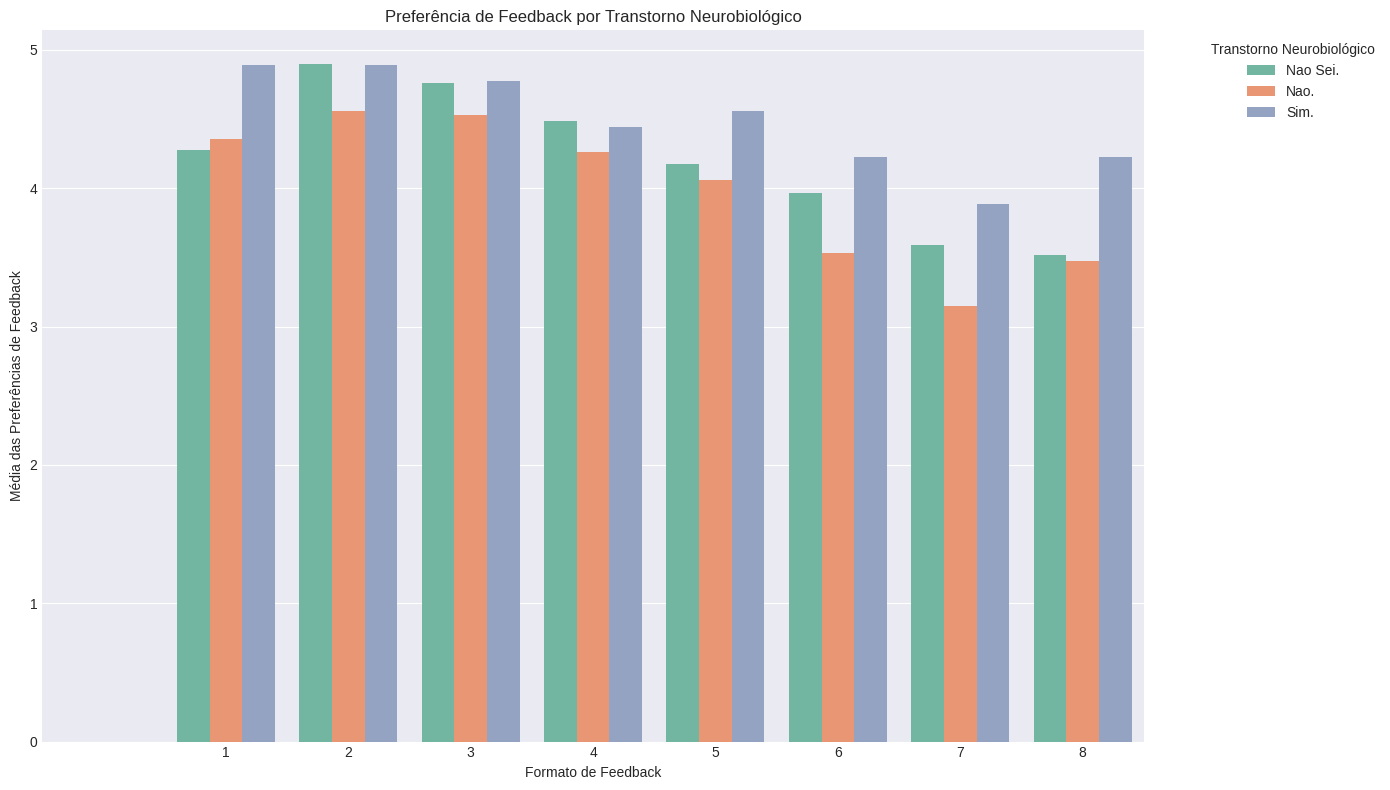

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados com o delimitador correto
file_path = 'feedback.csv'
df = pd.read_csv(file_path, delimiter=';')

# Selecionar as colunas de feedback e a coluna de transtorno neurobiológico
feedback_columns = df.columns[8:]  # Ajuste o índice conforme necessário
feedback_df = df[feedback_columns].copy()

# Substituir os valores dos formatos de feedback por números de 1 a 8
feedback_df = feedback_df.apply(pd.to_numeric, errors='coerce')

# Adicionar a coluna de transtorno neurobiológico ao DataFrame
feedback_df['Transtorno Neurobiológico'] = df['Voca apresenta algum transtorno neurobiolagico? (TDAH, TEA, distarbios da aprendizagem, entre outros)']  # Ajuste o nome da coluna conforme necessário

# Transformar o DataFrame para formato longo
long_df = feedback_df.melt(id_vars=['Transtorno Neurobiológico'], value_vars=feedback_columns,
                           var_name='Formato de Feedback', value_name='Preferência')

# Mapear os formatos de feedback para números de 1 a 8
long_df['Formato de Feedback'] = long_df['Formato de Feedback'].map(
    lambda x: feedback_columns.tolist().index(x) + 1)

# Agrupar por transtorno neurobiológico e formato de feedback
grouped = long_df.groupby(['Transtorno Neurobiológico', 'Formato de Feedback']).mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='Formato de Feedback', y='Preferência', hue='Transtorno Neurobiológico', palette='Set2')
plt.title('Preferência de Feedback por Transtorno Neurobiológico')
plt.xlabel('Formato de Feedback')
plt.ylabel('Média das Preferências de Feedback')
plt.legend(title='Transtorno Neurobiológico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(1, 9), labels=range(1, 9))
plt.tight_layout()
plt.show()